In [1]:
import cv2
import albumentations as A
from matplotlib import pyplot as plt
import imgaug.augmenters as iaa
import numpy as np

In [2]:
def visualize(fpath, transform, do_transform=True):
    '''visualize augmented image'''
    # Load the original image
    image = cv2.imread(fpath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if(do_transform):
        # Apply the transformations to the image
        if(isinstance(transform, A.Compose)):
            augmented_image = transform(image=image)['image']
        else:
            augmented_image = transform(image=image)

    # Visualize the original and augmented images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image)
    axes[0].set_title('Original')

    axes[1].imshow(augmented_image)
    axes[1].set_title('Augmented')

    # Remove the axis labels
    for ax in axes:
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

In [3]:
transform = A.Compose([
    A.OneOf([
            #A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
            A.ColorJitter(0.5, 0.5, 0.5, 0.25)
        ], p=1.0)
])

transform = iaa.Sequential([
        iaa.OneOf([
            # iaa.AddElementwise((-100, 100)),
            # aa.AddElementwise((-40, 40), per_channel=0.5),
            iaa.CoarsePepper(0.01, size_percent=(0.2, 0.2)),
            #iaa.CoarsePepper(0.02, size_percent=(0.2, 0.2))
            #iaa.AdditiveGaussianNoise(scale=(0, 0.2*255)),
            # iaa.AdditiveLaplaceNoise(scale=0.3*255),
            # iaa.AdditivePoissonNoise(60),
            #iaa.Dropout(p=(0.2, 0.3)),
            # iaa.CoarseDropout(0.2, size_percent=0.5)
                  
        ]),
])

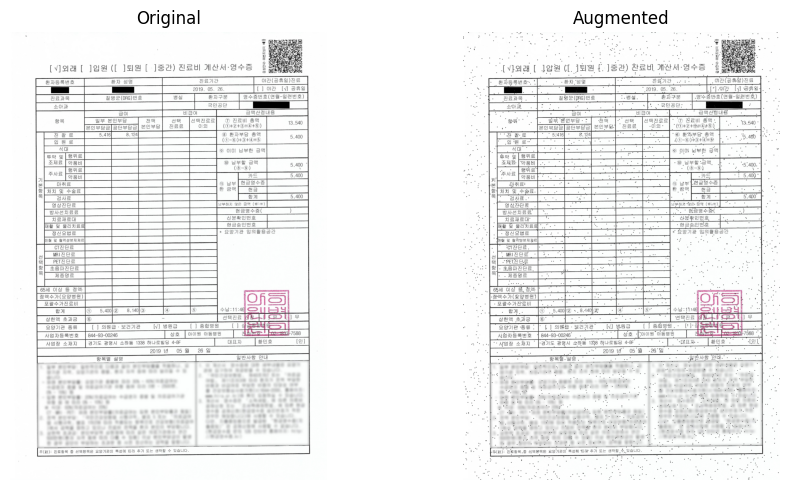

In [12]:
#scanned image, without noise
fpath = '../data/medical/img/train/drp.en_ko.in_house.deepnatural_002418.jpg'
visualize(fpath, transform) 

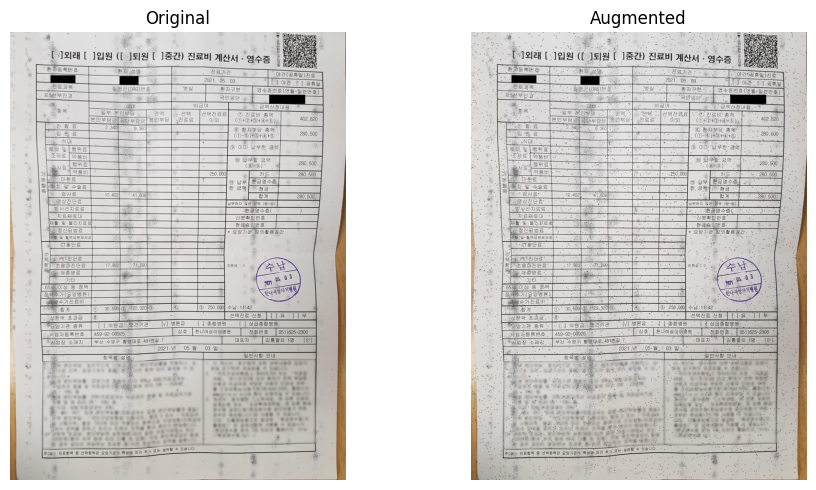

In [7]:
#scanned image, with noise
fpath = '../data/medical/img/test/drp.en_ko.in_house.deepnatural_002633.jpg'
visualize(fpath, transform) 

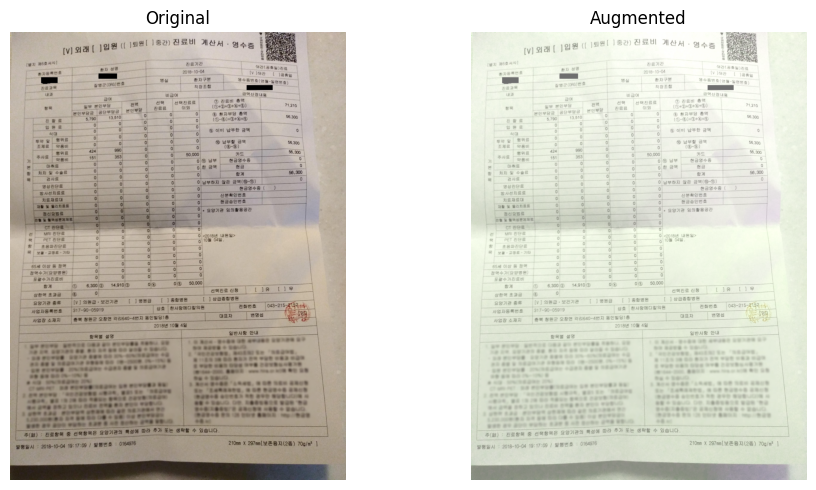

In [44]:
#image in natural scene
fpath = '../data/medical/img/train/drp.en_ko.in_house.deepnatural_002441.jpg'
visualize(fpath, transform) 

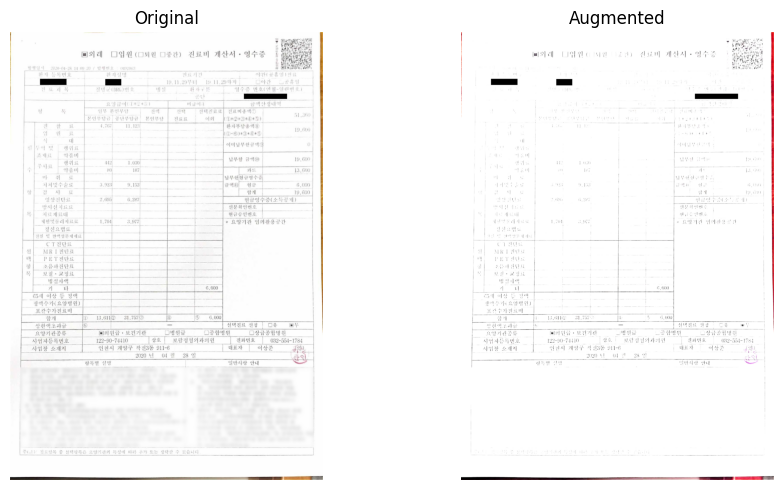

In [55]:
#image with vague words
fpath = '../data/medical/img/train/drp.en_ko.in_house.deepnatural_003347.jpg'
visualize(fpath, transform) 

In [24]:
def dotCluster(fpath):
    # Load the original image
    image = cv2.imread(fpath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    
    #np.random.seed(0)
    
    x_anchor = np.random.choice(28, np.random.choice([3, 6, 8]))
    while len(x_anchor) == 0: 
        x_anchor = np.random.choice(28, np.random.choice([3, 6, 8]))   
    y_anchor = np.random.choice(28, np.random.choice([3, 6, 8]))
    while len(y_anchor) == 0: 
        y_anchor = np.random.choice(28, np.random.choice([3, 6, 8]))
    
    scale = 10
    
    for i in range(28):
        for j in range(28):
            if j in x_anchor and i in y_anchor: 
                for _ in range(int(np.random.normal(200, 5))):
                    dot_color = (0, 0, 0)  # (B, G, R)
                    x=min(int(width/28*j+np.random.normal(0, 3/210*width)),width-1)
                    y=min(int(height/28*i+np.random.normal(0, 6/297*height)),height-1)
                    image[y, x] = dot_color
                    image[min(y+1,height-1), x] = dot_color
                    image[y, min(x+1,width-1)] = dot_color
                    image[min(y+1,height-1), min(x+1,width-1)] = dot_color

                    #plt.scatter(y=height/28*i+np.random.normal(0, 6/297*height), x=width/28*j+np.random.normal(0, 3/210*width),s=0.7, alpha=0.3, c='black')

    # Visualize the original and augmented images side by side
    fig, axes = plt.subplots(1, 2, figsize=(30, 15))
    axes[0].imshow(image)
    axes[0].set_title('Augmented')

    # Remove the axis labels
    for ax in axes:
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

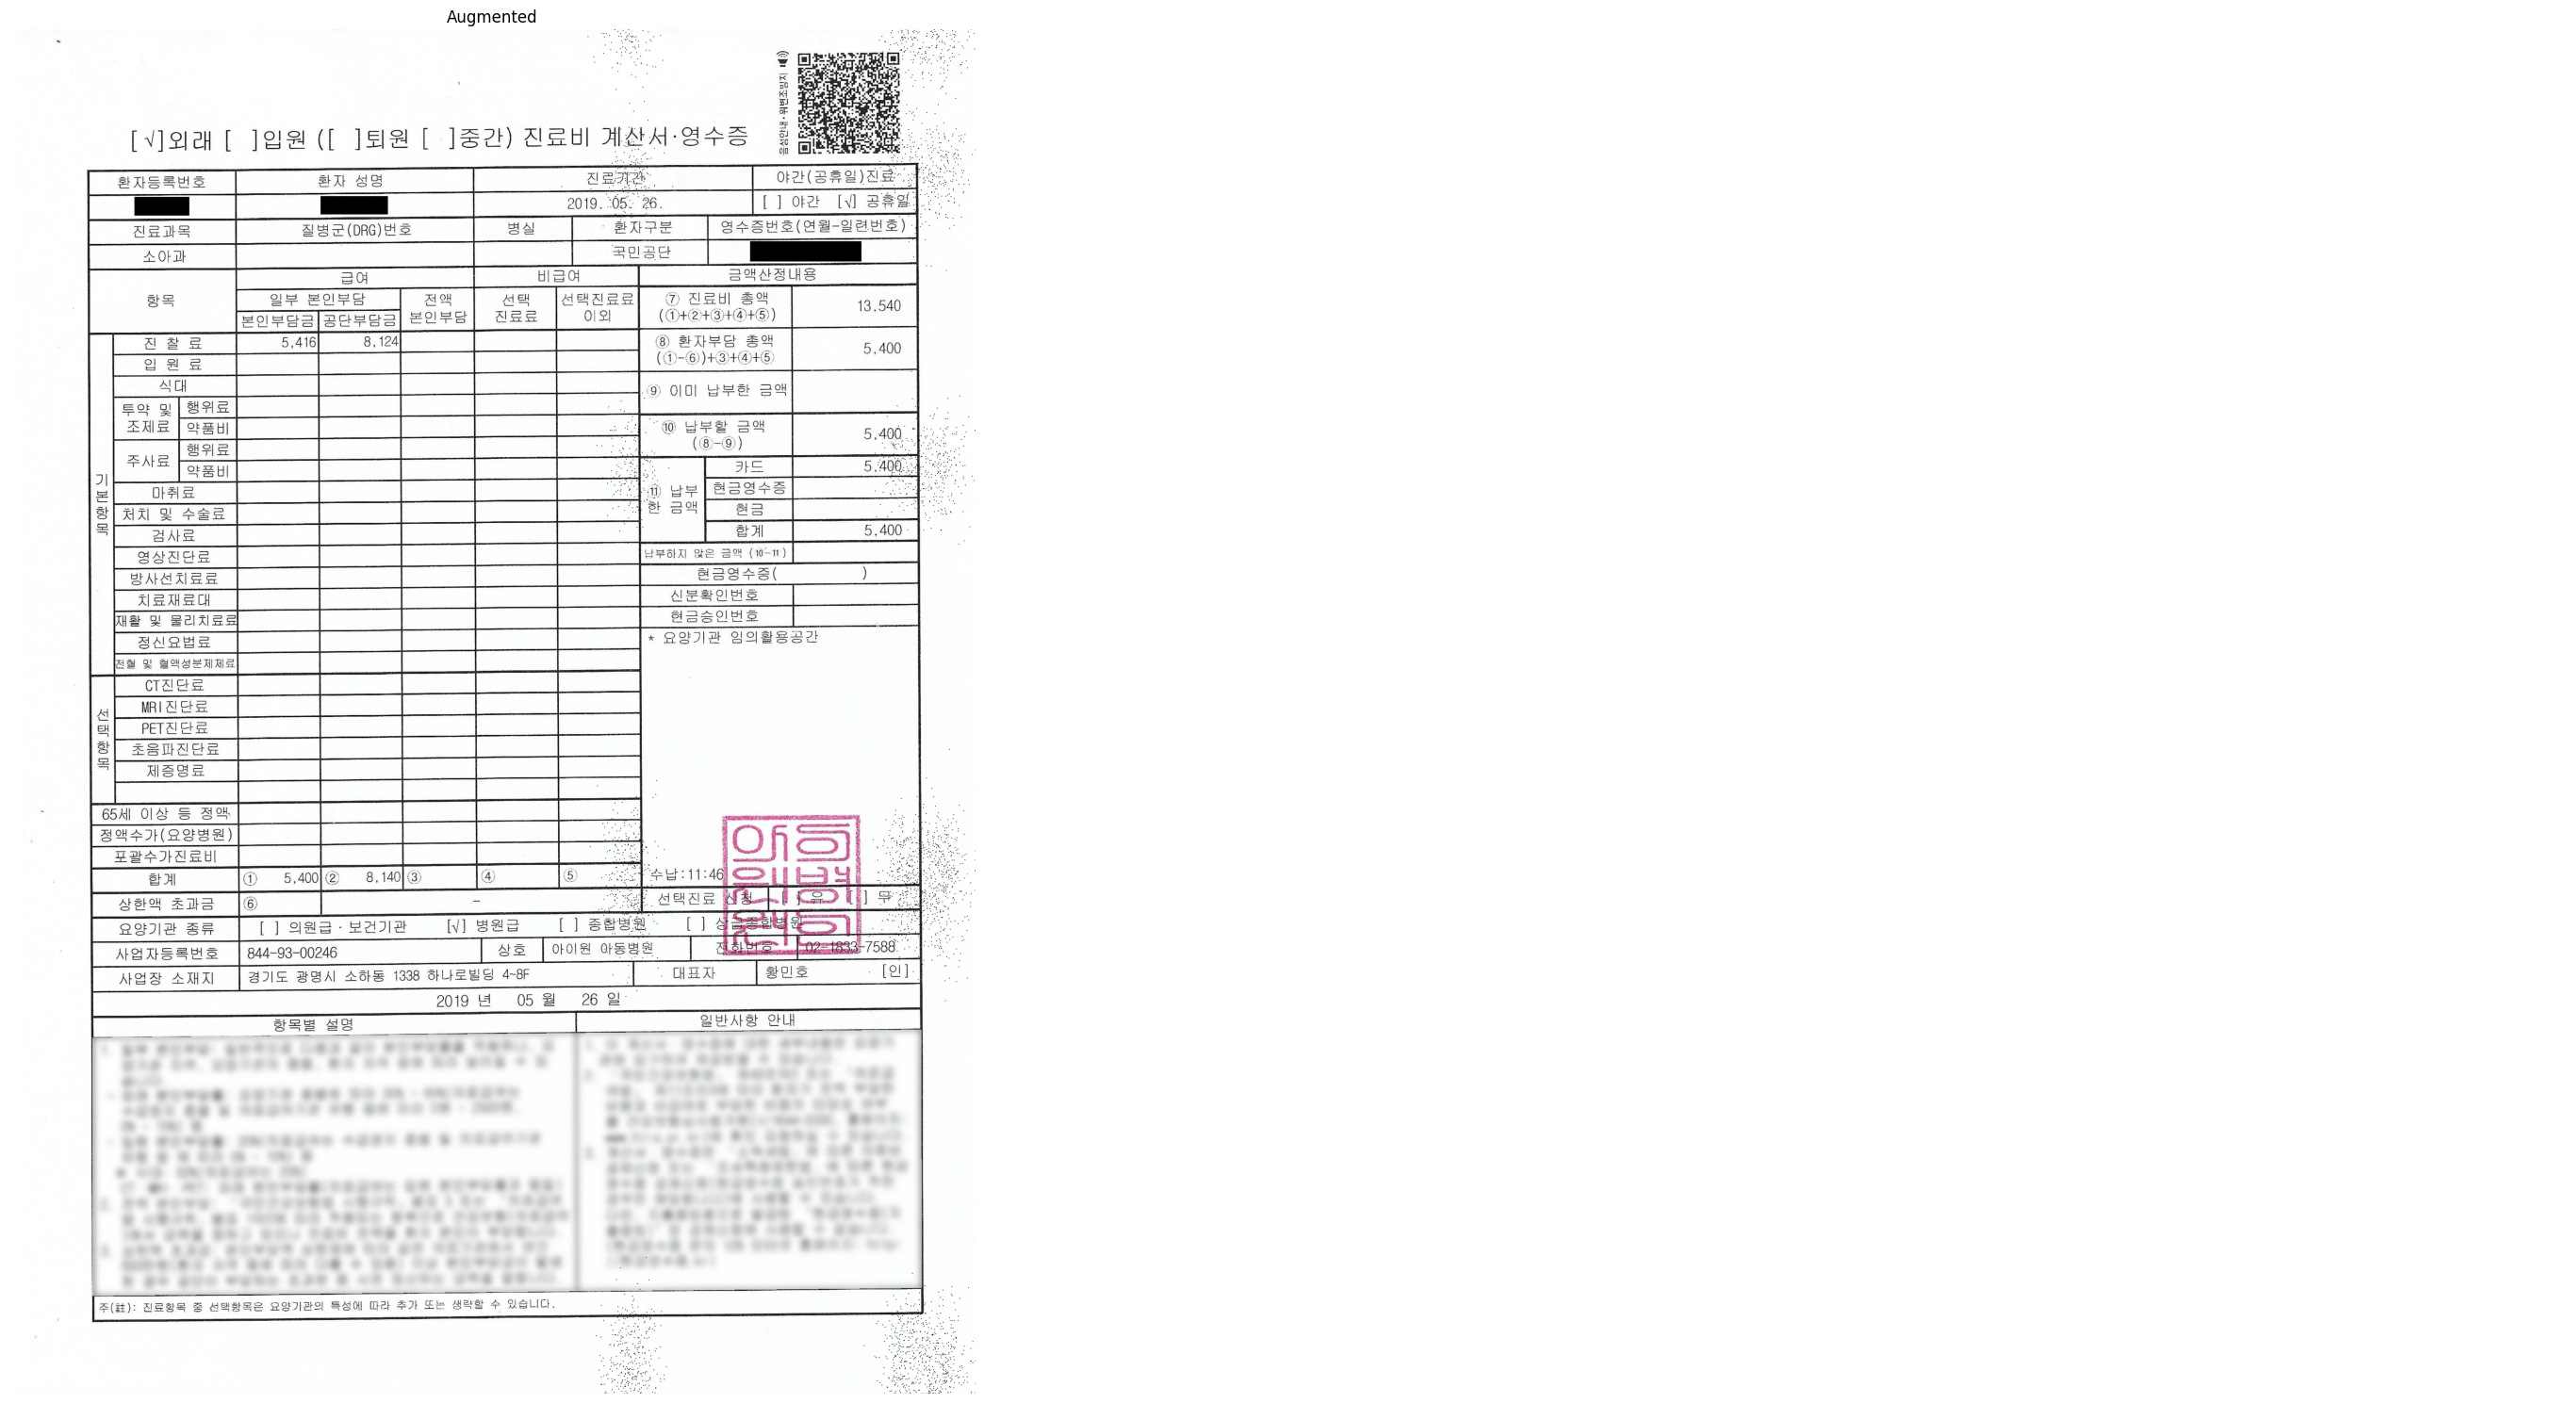

In [25]:
#scanned image, without noise
fpath = '../data/medical/img/train/drp.en_ko.in_house.deepnatural_002418.jpg'
dotCluster(fpath) 